## Substitution 
- $\frac{dy}{dt} = v$
- $\frac{dv}{dt} = -2\beta v - \omega_o^2 y+A\cos(\omega t)$

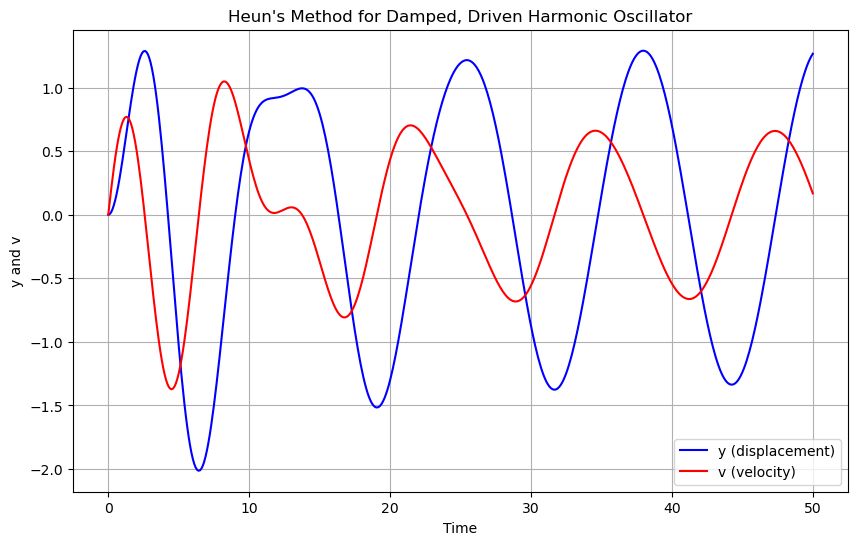

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Define the system of ODEs for a damped, driven harmonic oscillator
def system(t, y, v, beta, omega_0, A, omega):
    dy_dt = v
    dv_dt = -2 * beta * v - omega_0**2 * y + A * np.cos(omega * t)
    return dy_dt, dv_dt

# Heun's method for second-order ODE
def heuns_method(y0, v0, t0, t_end, h, beta, omega_0, A, omega):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros(len(t_values))
    v_values = np.zeros(len(t_values))

    y_values[0] = y0
    v_values[0] = v0

    for i in range(1, len(t_values)):
        t = t_values[i-1]
        y = y_values[i-1]
        v = v_values[i-1]

        # Predictor step (Euler's method)
        dydt, dvdt = system(t, y, v, beta, omega_0, A, omega)
        y_predictor = y + h * dydt
        v_predictor = v + h * dvdt

        # Corrector step
        dydt_predictor, dvdt_predictor = system(t + h, y_predictor, v_predictor, beta, omega_0, A, omega)
        y_corrector = y + (h / 2) * (dydt + dydt_predictor)
        v_corrector = v + (h / 2) * (dvdt + dvdt_predictor)
        
        # Update values
        y_values[i] = y_corrector
        v_values[i] = v_corrector


    return t_values, y_values, v_values

# Parameters for the damped, driven harmonic oscillator
beta = 0.1  # damping coefficient
omega_0 = 1.0  # natural frequency
A = 1.0  # amplitude of the driving force
omega = 0.5  # frequency of the driving force

# Initial conditions
y0 = 0.0  # initial displacement
v0 = 0.0  # initial velocity
t0 = 0.0  # initial time
t_end = 50 # final time
h = 0.1  # step size

# Solve the system using Heun's method
t_values, y_values, v_values = heuns_method(y0, v0, t0, t_end, h, beta, omega_0, A, omega)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t_values, y_values, label='y (displacement)', color='b')
plt.plot(t_values, v_values, label='v (velocity)', color='r')
plt.xlabel('Time')
plt.ylabel('y and v')
plt.legend()
plt.title("Heun's Method for Damped, Driven Harmonic Oscillator")
plt.grid(True)
plt.show()